In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Airbnb_Open_Data.csv")

C:\Users\deeks\AppData\Local\Temp\ipykernel_12964\3424017332.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [9]:
#How many unique neighborhoods are in the dataset?

num_unique_neighborhoods = df['neighbourhood'].nunique()
print(f"Number of unique neighborhoods: {num_unique_neighborhoods}")


Number of unique neighborhoods: 224


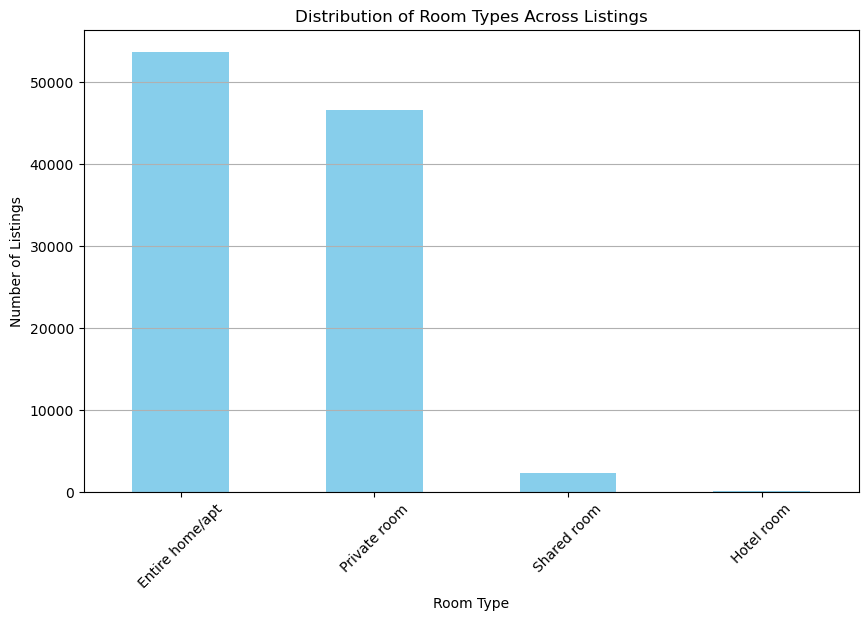

In [10]:
#What is the distribution of room type across listings?

room_type_counts = df['room type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Room Types Across Listings')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [16]:
#Are there any missing values in critical columns like price, host id, or last review?

missing_values_in_price = df["price"].isna().sum()
print("missing values in price column :", missing_values_in_price)
missing_values_in_host_id = df["host id"].isna().sum()
print("missing values in Host ID column :", missing_values_in_host_id)
missing_values_in_last_review = df["last review"].isna().sum()
print("missing values in last review column :", missing_values_in_last_review)

missing values in price column : 247
missing values in Host ID column : 0
missing values in last review column : 15893


In [17]:
#Convert the last review column to a datetime format and find the most recent review date.

df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Find the most recent review date
most_recent_review = df['last review'].max()
print("Most recent review date:", most_recent_review)


Most recent review date: 2058-06-16 00:00:00


In [18]:
#Standardize column names (e.g., make them lowercase and replace spaces with underscores).

df.columns = df.columns.str.lower().str.replace(' ','_')

In [19]:
#Handle missing values in reviews per month, house_rules, and license.
df['reviews_per_month'].fillna(0, inplace=True) 
df['house_rules'].fillna('No rules specified', inplace=True)
df['license'].fillna('Not provided', inplace=True)

C:\Users\deeks\AppData\Local\Temp\ipykernel_12964\603156209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)
C:\Users\deeks\AppData\Local\Temp\ipykernel_12964\603156209.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [20]:
#Convert price and service fee columns to numeric values (remove any currency symbols if present).
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Remove currency symbols and convert to float
df['service_fee'] = df['service_fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Same for service fee

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\deeks\AppData\Local\Temp\ipykernel_12964\2593046160.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Remove currency symbols and convert to float
C:\Users\deeks\AppData\Local\Temp\ipykernel_12964\2593046160.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service_fee'] = df['service_fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Same for service fee


In [21]:
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,Not provided
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,Not provided
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",Not provided
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,No rules specified,Not provided
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",Not provided


In [22]:
#What is the average, median, and standard deviation of price?
average_price = df['price'].mean()
median_price = df['price'].median()
std_dev_price = df['price'].std()

print(f"Average price: {average_price}")
print(f"Median price: {median_price}")
print(f"Standard deviation of price: {std_dev_price}")

Average price: 625.2935360325152
Median price: 624.0
Standard deviation of price: 331.6716135243197


In [23]:
#Which neighbourhood group has the highest average listing price?
highest_avg_price_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().idxmax()
highest_avg_price_value = df.groupby('neighbourhood_group')['price'].mean().max()

print(f"Neighborhood group with the highest average listing price: {highest_avg_price_neighbourhood} (${highest_avg_price_value})")

Neighborhood group with the highest average listing price: Queens ($630.2076469699259)


In [24]:
#What percentage of hosts have verified identities (host_identity_verified)?
percentage_verified_hosts = (df['host_identity_verified'].value_counts(normalize=True) * 100).get(True, 0)
print(f"Percentage of hosts with verified identities: {percentage_verified_hosts:.2f}%")

Percentage of hosts with verified identities: 0.00%


In [25]:
#What is the most common cancellation_policy?
most_common_cancellation_policy = df['cancellation_policy'].mode()[0]
print(f"Most common cancellation policy: {most_common_cancellation_policy}")

Most common cancellation policy: moderate


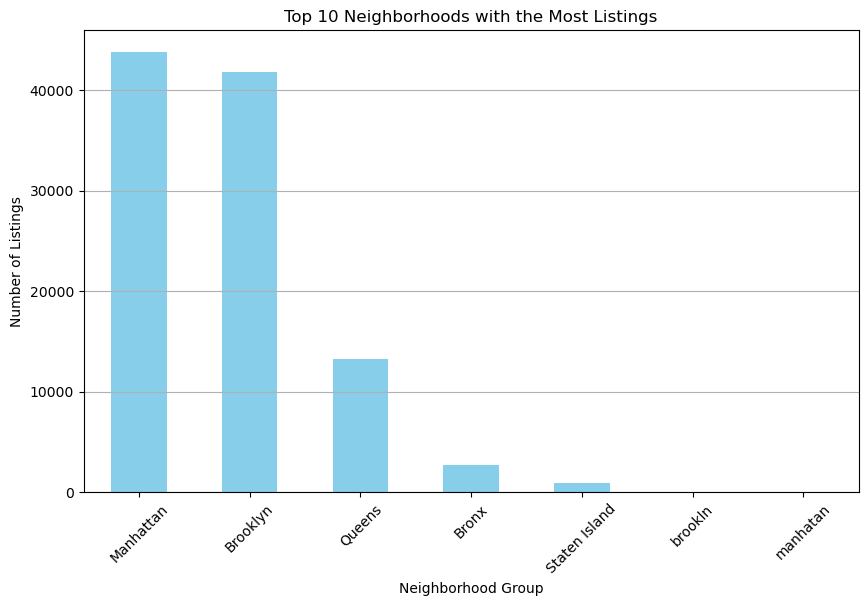

In [26]:
#Create a bar chart of the top 10 neighborhoods with the most listings.
top_neighborhoods = df['neighbourhood_group'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the Most Listings')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

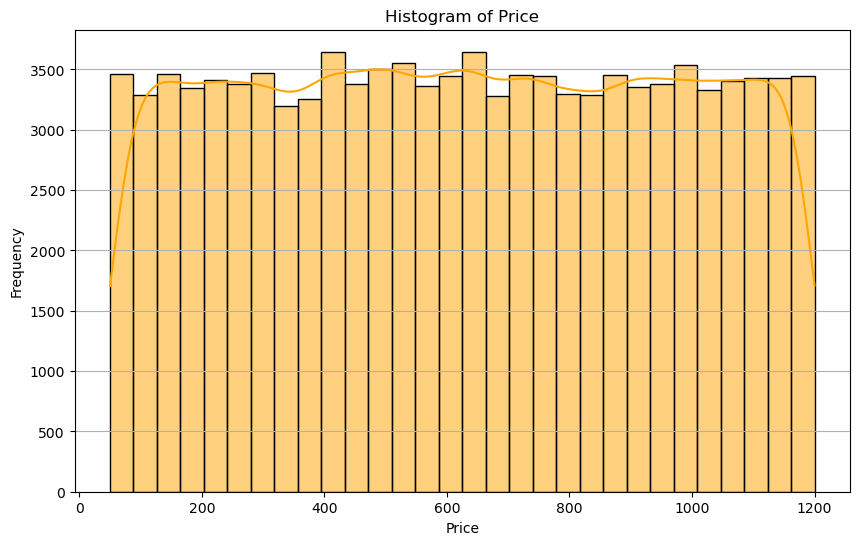

In [27]:
#Plot a histogram of price—are there any outliers?
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='orange')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

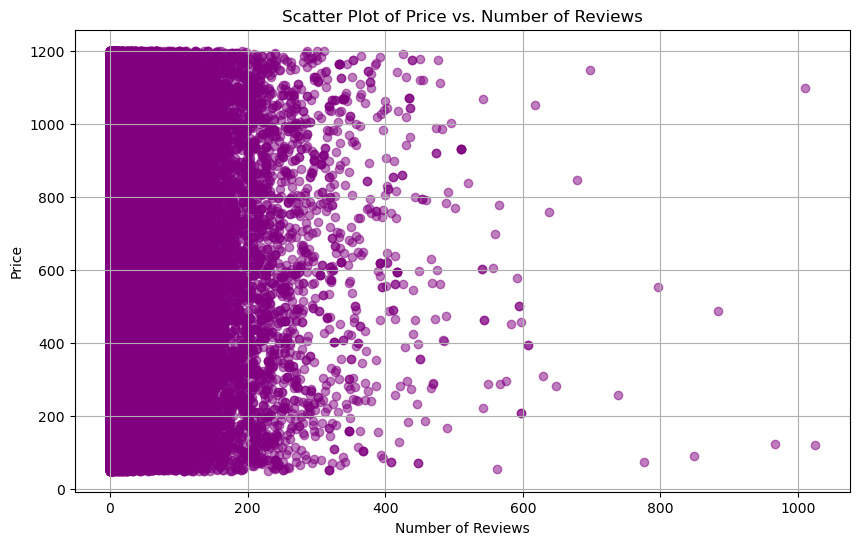

In [28]:
#Generate a scatter plot of price vs. number of reviews.
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.grid()
plt.show()

In [29]:
#Find the host with the most listings (calculated host listings count).


host_with_most_listings = df.groupby('host_id')['calculated_host_listings_count'].sum().idxmax()
most_listings_count = df.groupby('host_id')['calculated_host_listings_count'].sum().max()

print(f"Host with the most listings (ID: {host_with_most_listings}) has {most_listings_count} listings.")

Host with the most listings (ID: 695353567) has 332.0 listings.


Correlation matrix:
                       price  minimum_nights  number_of_reviews
price              1.000000       -0.003471           0.005229
minimum_nights    -0.003471        1.000000          -0.049997
number_of_reviews  0.005229       -0.049997           1.000000


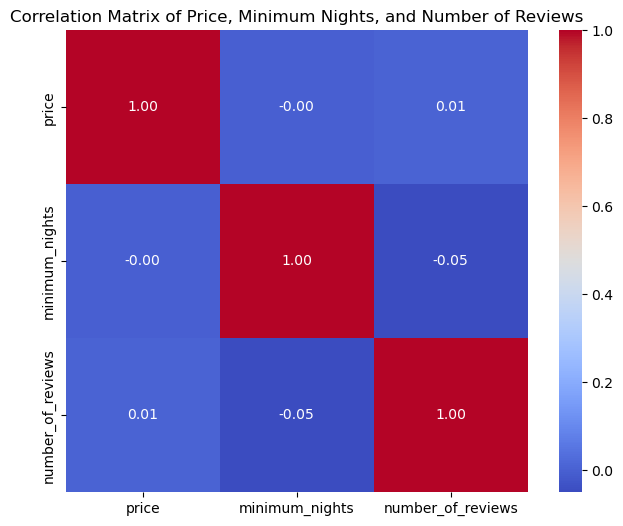

In [30]:
#Identify any correlation between price, minimum nights, and number of reviews.
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews']].corr()
print("Correlation matrix:\n", correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Price, Minimum Nights, and Number of Reviews')
plt.show()

In [31]:
#Find the most common house_rules mentioned across listings (if applicable).
most_common_house_rules = df['house_rules'].mode()[0]
print(f"Most common house rules: {most_common_house_rules}")

Most common house rules: No rules specified


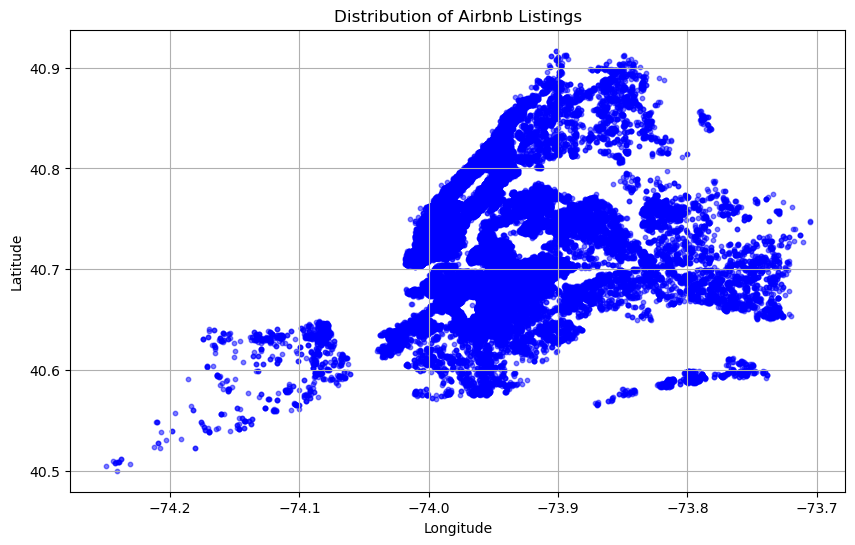

In [32]:
#Map the distribution of Airbnb listings using lat and long with a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['lat'], alpha=0.5, color='blue', s=10)  # s is the size of the points
plt.title('Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()